מגישים: עמית אברמוביץ-318969045 ומאג'ד נאטור-212066260

## **0. Setting the kaggle API And downloading the dataset** 

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import pearsonr
%matplotlib inline

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


## **Diamonds Dataset**


In [ ]:
# Creating a dataset directory
!mkdir ./datasets
!mkdir ./datasets/Diamonds

# download the dataset from Kaggle and unzip it
!kaggle datasets download shivam2503/diamonds -p ./datasets/Diamonds/
!chdir ./datasets/Diamonds
!unzip "/content/datasets/Diamonds/diamonds.zip" -d "/content/datasets/Diamonds/"
!ls ./datasets/Diamonds

mkdir: cannot create directory ‘./datasets’: File exists
mkdir: cannot create directory ‘./datasets/Diamonds’: File exists
diamonds.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: chdir: command not found
Archive:  /content/datasets/Diamonds/diamonds.zip
replace /content/datasets/Diamonds/diamonds.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
diamonds.csv  diamonds.zip


## **Question 1**

In [ ]:
df = pd.read_csv("/content/datasets/Diamonds/diamonds.csv")
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Creating the model:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2) # dividing data to test and train 80%-20%
knn_classifier3 = KNeighborsClassifier(n_neighbors=3) # setting the knn=3
featues_list = ["x", "y", "carat", "depth","price","table"] # creating the features list
knn_classifier3.fit(train_df[featues_list], train_df["clarity"].values) # predicting clarity

actual_clarity_list= test_df["clarity"].values
predict_clarity_list = knn_classifier3.predict(test_df[featues_list])
predict_clarity_list

array(['VS1', 'SI2', 'SI1', ..., 'SI1', 'SI1', 'SI1'], dtype=object)

### Visually displaying the model:

In [ ]:
cm = metrics.confusion_matrix(actual_clarity_list,predict_clarity_list)

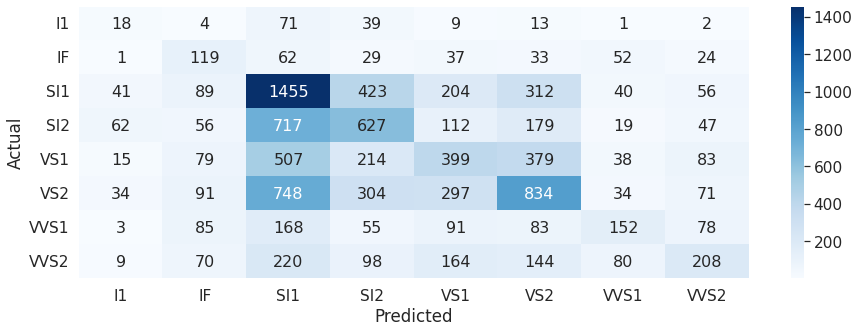

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_cm = pd.DataFrame(cm, columns=knn_classifier3.classes_, index = knn_classifier3.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

### Calcualting the Accuracy and F1 Score:

In [ ]:
from sklearn.metrics import f1_score
print(f"Accuracy score is: {metrics.accuracy_score(actual_clarity_list,predict_clarity_list)}")
print(f"F1 score is: {metrics.f1_score(actual_clarity_list, predict_clarity_list, average='weighted')}")

Accuracy score is: 0.35335558027437897
F1 score is: 0.34523702585547206


## **Question 2**

### Writing a function that calculates the accuracy and f1 for different k values:

In [ ]:
def calcualte_f1_accuracy(k): #(f1 score, accuracy)

    train_df, test_df = train_test_split(df, test_size=0.3)
    knn_classifier = KNeighborsClassifier(n_neighbors=num)
    featues_list = ["x", "y", "carat", "depth","price","table"]
    knn_classifier.fit(train_df[featues_list], train_df["clarity"].values)

    actual_clarity_list= test_df["clarity"].values
    predict_clarity_list = knn_classifier.predict(test_df[featues_list])
    predict_clarity_list

    y_true = test_df["clarity"].values
    y_pred = predict_clarity_list
    a =f1_score(y_true, y_pred,average='weighted')
    b= metrics.accuracy_score(actual_clarity_list,predict_clarity_list)
    return (a,b)

In [ ]:
list_accuracy= [] # list that contains calcualted accuracy values from 1 to num
list_f1= [] # list that contains calcualted f1 values from 1 to num
num = 15 
for i in range(1,num+1):
    x = calcualte_f1_accuracy(i)
    list_accuracy.append(x[1])
    list_f1.append(x[0])

### Accuracy Graph:

In [ ]:
import seaborn as sns

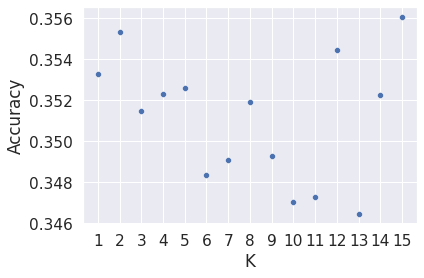

In [ ]:
# all k values from 1-15 and thier calculated Accuracy 
g = sns.scatterplot(x = range(1,num+1), y= list_accuracy)
g.set(xlabel='K', ylabel='Accuracy')
plt.xticks(range(1,num+1))
plt.show()

### F1 Graph:

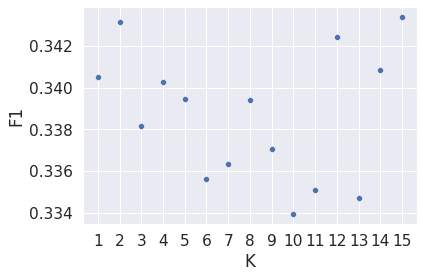

In [ ]:
# all k values from 1-15 and thier calculated F1 
g1 = sns.scatterplot(x = range(1,num+1), y= list_f1)
g1.set(xlabel='K', ylabel='F1')
plt.xticks(range(1,num+1))
plt.show()

# **Question 3**

DecisionTree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

train_df, test_df = train_test_split(df, test_size=0.2)
tree_clf = DecisionTreeClassifier()
featues_list = ["x", "y", "carat", "depth","price","table"]
tree_clf.fit(train_df[featues_list], train_df["cut"].values)

actual_cut_list_tree= test_df["cut"].values
predict_cut_list_tree = tree_clf.predict(test_df[featues_list])

In [ ]:
cmTree = metrics.confusion_matrix(actual_cut_list_tree,predict_cut_list_tree)

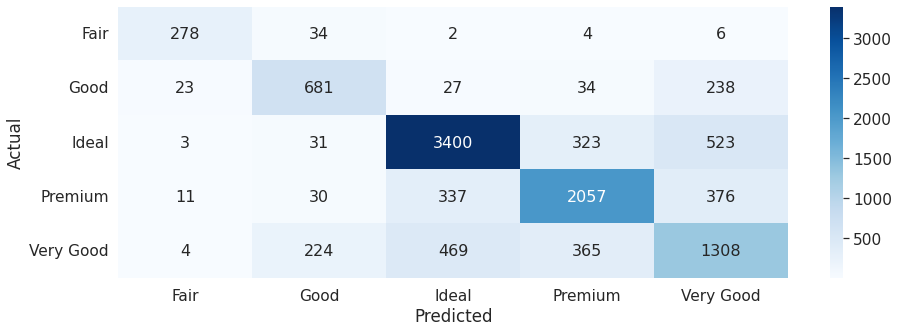

In [ ]:
df_cmTree = pd.DataFrame(cmTree, columns=tree_clf.classes_, index = tree_clf.classes_)
df_cmTree.index.name = 'Actual'
df_cmTree.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmTree, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

**module for k = (1,3,5,7):**

In [ ]:
for i in range(1,9,2):
  train_df, test_df = train_test_split(df, test_size=0.2) # dividing data to test and train 80%-20%
  knn_classifier3A = KNeighborsClassifier(n_neighbors=i) # setting the knn=1,3,5,7
  featues_list = ["x", "y", "carat", "depth","price","table"] # creating the features list
  knn_classifier3A.fit(train_df[featues_list], train_df["cut"].values) # predicting cut
  actual_cut_listCut= test_df["cut"].values
  if(i == 1):
      predict_cut_list1 = knn_classifier3A.predict(test_df[featues_list])
      cm1 = metrics.confusion_matrix(actual_cut_listCut,predict_cut_list1)
  if(i==3):
      predict_cut_list3 = knn_classifier3A.predict(test_df[featues_list])
      cm3 = metrics.confusion_matrix(actual_cut_listCut,predict_cut_list3)
  if(i==5):
      predict_cut_list5 = knn_classifier3A.predict(test_df[featues_list])
      cm5 = metrics.confusion_matrix(actual_cut_listCut,predict_cut_list5)
  if(i==7):
      predict_cut_list7 = knn_classifier3A.predict(test_df[featues_list])
      cm7 = metrics.confusion_matrix(actual_cut_listCut,predict_cut_list7)


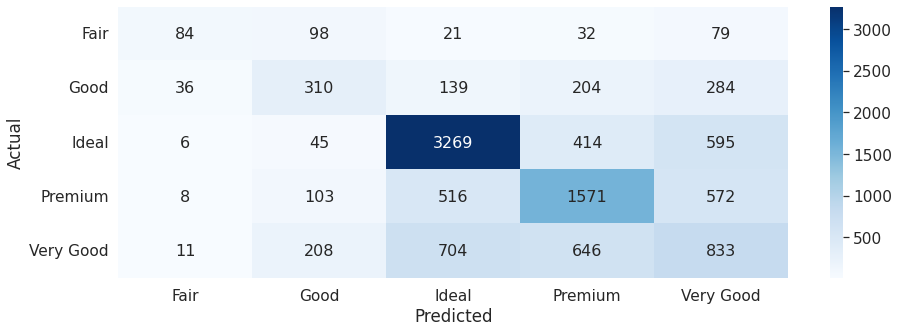

In [ ]:
#module , knn=1
df_cm1 = pd.DataFrame(cm1, columns=knn_classifier3A.classes_, index = knn_classifier3A.classes_)
df_cm1.index.name = 'Actual'
df_cm1.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm1, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

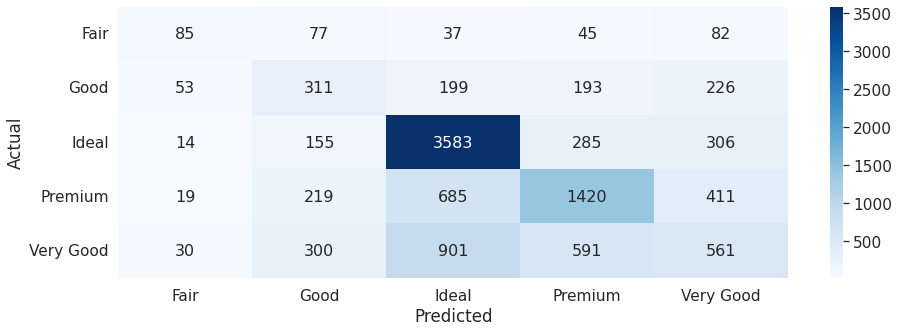

In [ ]:
#module , knn=3
df_cm3 = pd.DataFrame(cm3, columns=knn_classifier3A.classes_, index = knn_classifier3A.classes_)
df_cm3.index.name = 'Actual'
df_cm3.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm3, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

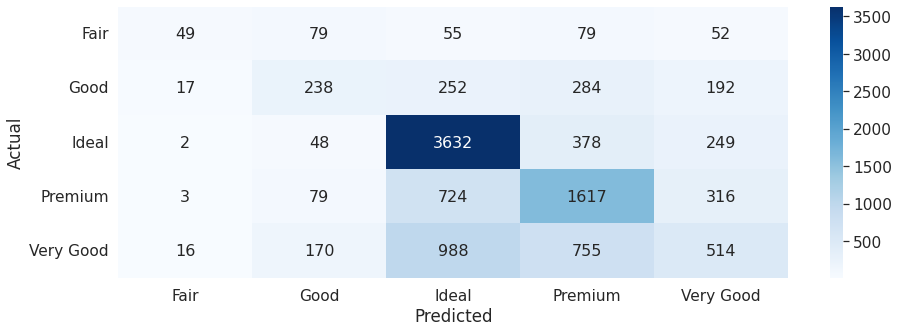

In [ ]:
#module , knn=5
df_cm5 = pd.DataFrame(cm5, columns=knn_classifier3A.classes_, index = knn_classifier3A.classes_)
df_cm5.index.name = 'Actual'
df_cm5.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm5, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

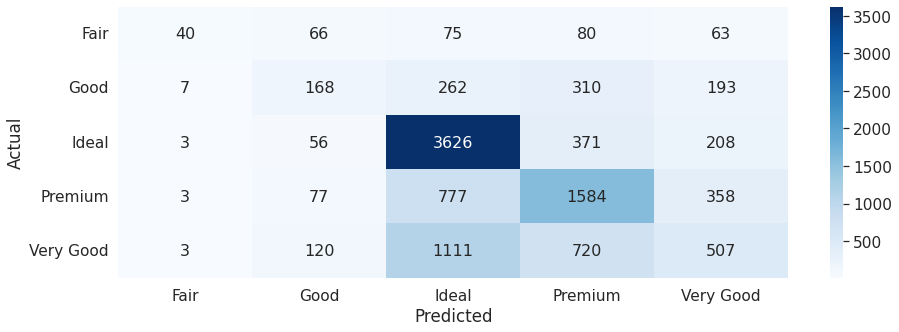

In [ ]:
#module , knn=7
df_cm7 = pd.DataFrame(cm7, columns=knn_classifier3A.classes_, index = knn_classifier3A.classes_)
df_cm7.index.name = 'Actual'
df_cm7.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm7, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [ ]:
print("DescisionTreeAccuracy:" , metrics.accuracy_score(actual_cut_list_tree,predict_cut_list_tree))
print("Knn = 1" , metrics.accuracy_score(actual_cut_listCut,predict_cut_list1))
print("Knn = 3" , metrics.accuracy_score(actual_cut_listCut,predict_cut_list3))
print("Knn = 5" , metrics.accuracy_score(actual_cut_listCut,predict_cut_list5))
print("Knn = 7" , metrics.accuracy_score(actual_cut_listCut,predict_cut_list7))

DescisionTreeAccuracy: 0.7159807193177605
Knn = 1 0.2911568409343715
Knn = 3 0.30116796440489435
Knn = 5 0.3199851687059696
Knn = 7 0.5492213570634038


# **Question 4**

In [ ]:
from sklearn import preprocessing
Color = set(train_df['color'].values)
Clarity = set(train_df['clarity'].values)

In [ ]:
le_color = preprocessing.LabelEncoder()
le_color.fit(list(Color))
le_clarity = preprocessing.LabelEncoder()
le_clarity.fit(list(Clarity))

LabelEncoder()

In [ ]:
l_color = le_color.transform(df['color'].values)
l_clarity = le_clarity.transform(df['clarity'].values)
df['colorToNumb'] = l_color
df['clarityToNumb'] = l_clarity

In [ ]:
#we do what we did in question 3 again with 2 more cols..
for i in range(1,9,2):
  train_df, test_df = train_test_split(df, test_size=0.2) # dividing data to test and train 80%-20%
  knn_classifier3AA = KNeighborsClassifier(n_neighbors=i) # setting the knn=1,3,5,7
  featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb" ,"clarityToNumb"] # creating the features list
  knn_classifier3AA.fit(train_df[featues_list], train_df["cut"].values) # predicting cut
  actual_cut_listCutnew= test_df["cut"].values
  if(i == 1):
      predict_cut_list1new = knn_classifier3AA.predict(test_df[featues_list])
      cm1new = metrics.confusion_matrix(actual_cut_listCutnew,predict_cut_list1new)
  if(i==3):
      predict_cut_list3new = knn_classifier3AA.predict(test_df[featues_list])
      cm3new = metrics.confusion_matrix(actual_cut_listCutnew,predict_cut_list3new)
  if(i==5):
      predict_cut_list5new = knn_classifier3AA.predict(test_df[featues_list])
      cm5new = metrics.confusion_matrix(actual_cut_listCutnew,predict_cut_list5new)
  if(i==7):
      predict_cut_list7new = knn_classifier3AA.predict(test_df[featues_list])
      cm7new = metrics.confusion_matrix(actual_cut_listCutnew,predict_cut_list7new)

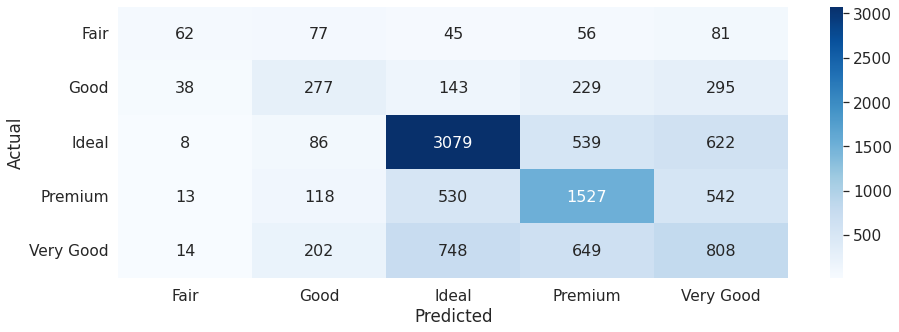

In [ ]:
#module , knn=1
df_cm1new = pd.DataFrame(cm1new, columns=knn_classifier3AA.classes_, index = knn_classifier3AA.classes_)
df_cm1new.index.name = 'Actual'
df_cm1new.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm1new, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

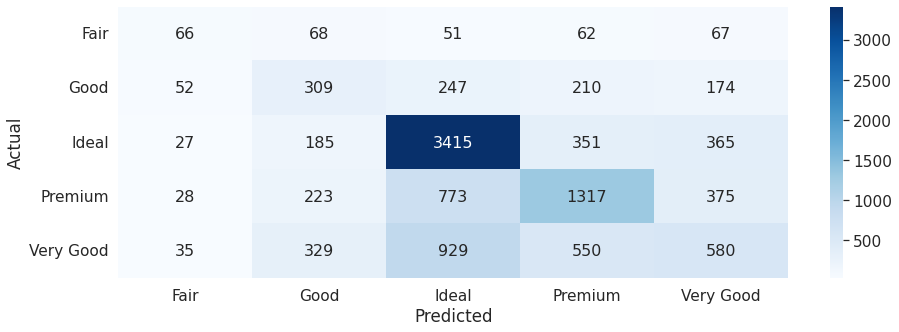

In [ ]:
#module , knn=3
df_cm3new = pd.DataFrame(cm3new, columns=knn_classifier3AA.classes_, index = knn_classifier3AA.classes_)
df_cm3new.index.name = 'Actual'
df_cm3new.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm3new, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

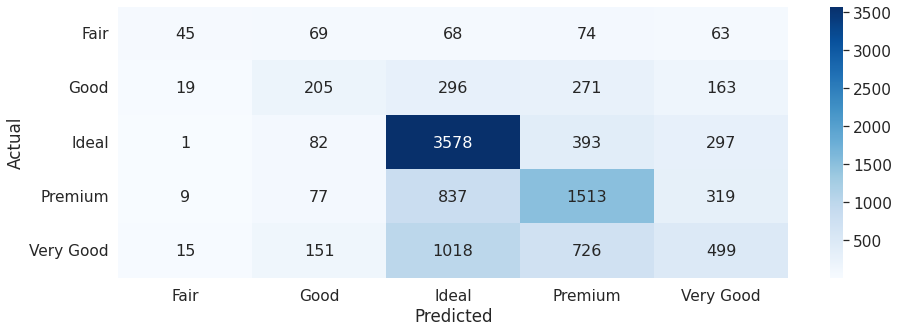

In [ ]:
#module , knn=5
df_cm5new = pd.DataFrame(cm5new, columns=knn_classifier3AA.classes_, index = knn_classifier3AA.classes_)
df_cm5new.index.name = 'Actual'
df_cm5new.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm5new, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

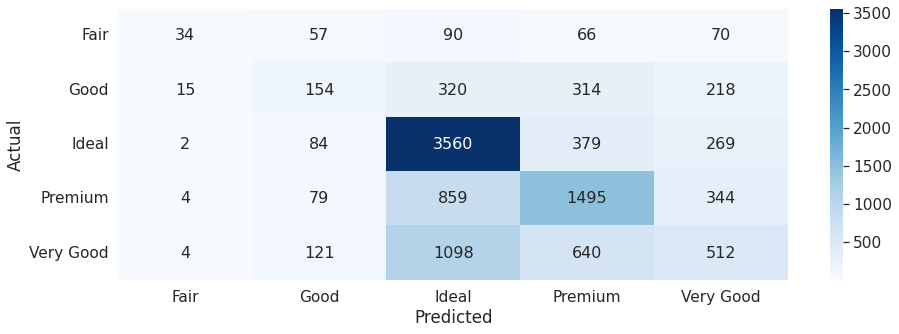

In [ ]:
#module , knn=7
df_cm7new = pd.DataFrame(cm7new, columns=knn_classifier3AA.classes_, index = knn_classifier3AA.classes_)
df_cm7new.index.name = 'Actual'
df_cm7new.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm7new, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

**DescisionTree:**

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)
tree_clf2 = DecisionTreeClassifier()
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"]
tree_clf2.fit(train_df[featues_list], train_df["cut"].values)
actual_cut_list_tree2= test_df["cut"].values
predict_cut_list_tree2 = tree_clf2.predict(test_df[featues_list])
cmTree2 = metrics.confusion_matrix(actual_cut_list_tree2,predict_cut_list_tree2)

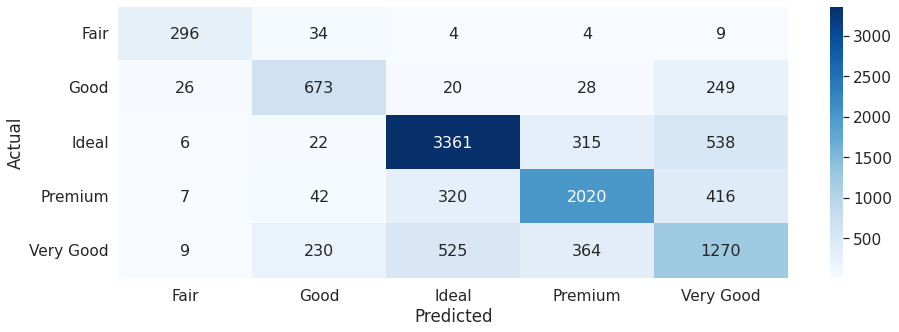

In [ ]:
df_cmTree2 = pd.DataFrame(cmTree2, columns=tree_clf2.classes_, index = tree_clf2.classes_)
df_cmTree2.index.name = 'Actual'
df_cmTree2.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmTree2, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [ ]:
print("DescisionTreeAccuracy:" , metrics.accuracy_score(actual_cut_list_tree2,predict_cut_list_tree2))
print("Knn = 1" , metrics.accuracy_score(actual_cut_listCutnew,predict_cut_list1new))
print("Knn = 3" , metrics.accuracy_score(actual_cut_listCutnew,predict_cut_list3new))
print("Knn = 5" , metrics.accuracy_score(actual_cut_listCutnew,predict_cut_list5new))
print("Knn = 7" , metrics.accuracy_score(actual_cut_listCutnew,predict_cut_list7new))
#prev scores:
# DescisionTreeAccuracy: 0.7208935854653319
# Knn = 1 0.2815164998146088
# Knn = 3 0.3013533555802744
# Knn = 5 0.31562847608453837
# Knn = 7 0.5494994438264739

DescisionTreeAccuracy: 0.7063403781979978
Knn = 1 0.30098257322951427
Knn = 3 0.3086763070077864
Knn = 5 0.31915090841675936
Knn = 7 0.5334631071560993


# **Question 5:**

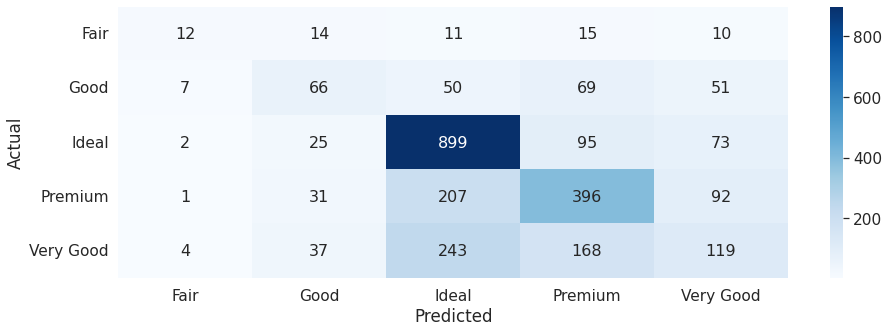

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.05) # 5%
knn_classifierq5 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5.predict(test_df[featues_list])
cm005 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc5 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)
df_cm = pd.DataFrame(cm005, columns=knn_classifierq5.classes_, index = knn_classifierq5.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

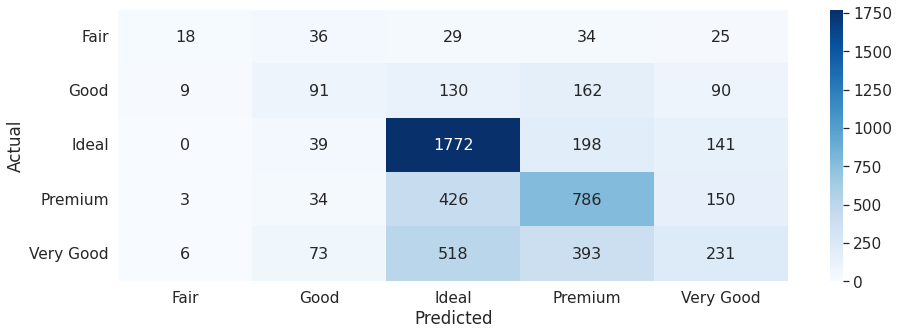

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1) # 10%
knn_classifierq5_2 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_2.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_2.predict(test_df[featues_list])
cm10 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc10 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm10, columns=knn_classifierq5_2.classes_, index = knn_classifierq5_2.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

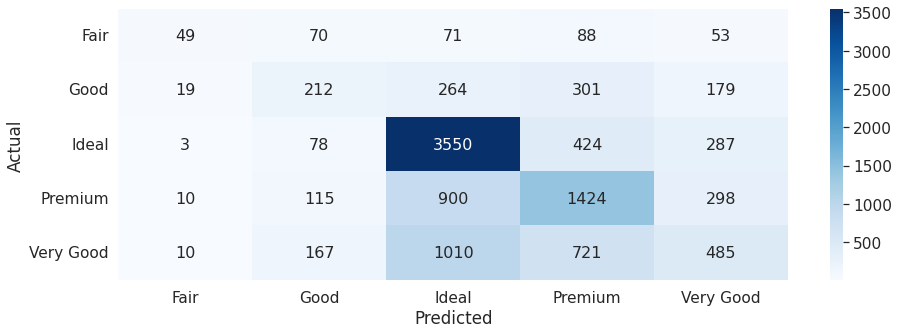

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2) # 20%
knn_classifierq5_3 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_3.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_3.predict(test_df[featues_list])
cm20 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc20 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm20, columns=knn_classifierq5_3.classes_, index = knn_classifierq5_3.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

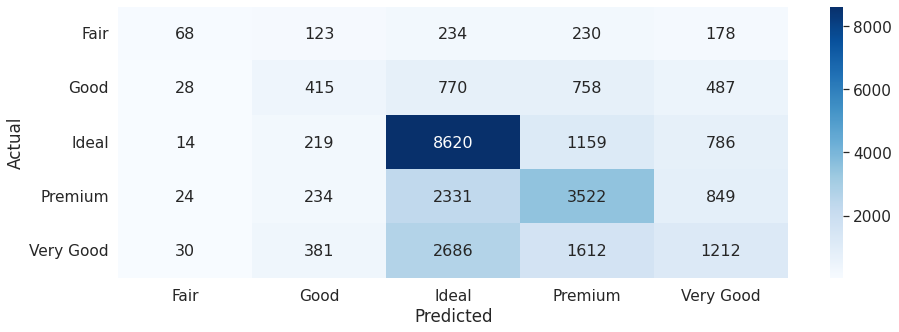

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.5) # 50%
knn_classifierq5_4 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_4.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_4.predict(test_df[featues_list])
cm50 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc50 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm50, columns=knn_classifierq5_4.classes_, index = knn_classifierq5_4.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

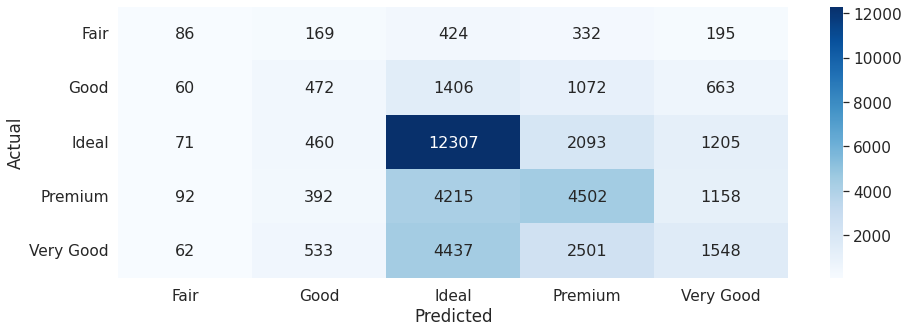

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.75) # 75%
knn_classifierq5_5 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_5.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_5.predict(test_df[featues_list])
cm75 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc75 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm75, columns=knn_classifierq5_5.classes_, index = knn_classifierq5_5.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

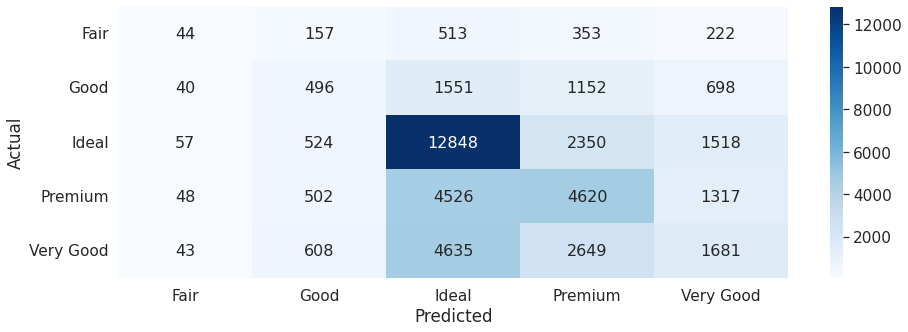

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.8) # 80%
knn_classifierq5_6 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_6.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_6.predict(test_df[featues_list])
cm80 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc80 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm80, columns=knn_classifierq5_6.classes_, index = knn_classifierq5_6.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

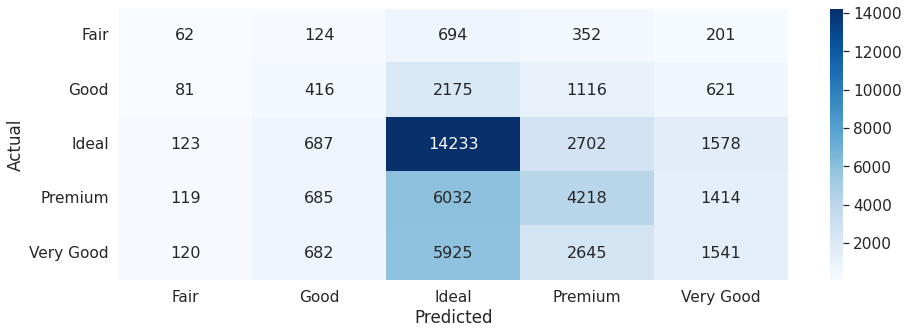

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.9) # 90%
knn_classifierq5_7 = KNeighborsClassifier(n_neighbors=5) 
featues_list = ["x", "y", "carat", "depth","price","table","colorToNumb","clarityToNumb"] # creating the features list
knn_classifierq5_7.fit(train_df[featues_list], train_df["cut"].values)

actual_clarity_list_q5= test_df["cut"].values
predict_clarity_list_q5 = knn_classifierq5_7.predict(test_df[featues_list])
cm90 = metrics.confusion_matrix(actual_clarity_list_q5,predict_clarity_list_q5)

acc90 = metrics.accuracy_score(actual_clarity_list_q5,predict_clarity_list_q5)

df_cm = pd.DataFrame(cm90, columns=knn_classifierq5_7.classes_, index = knn_classifierq5_7.classes_)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

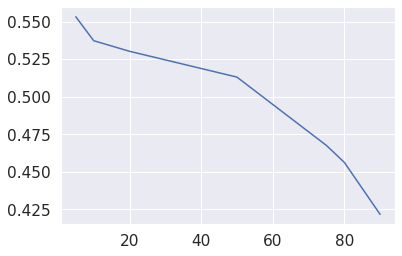

In [ ]:
x = [5 , 10 , 20 , 50 , 75 , 80 , 90]
y = [acc5 , acc10 , acc20 , acc50 , acc75, acc80 , acc90]
plt.plot(x, y)